# **JRA Race Condition Analysis**
by Evan Fadhil L

The purpose of this data is to do Race Condition Analysis from JRA日本中央競馬会 Horse Racing Dataset that scraped from https://www.netkeiba.com/ ,the largest site of Japanese horse racing.

The dataset scraped by https://www.kaggle.com/takamotoki and uploaded through Kaggle in 2021. <br> The link toward dataset are below:<br>
https://www.kaggle.com/takamotoki/jra-horse-racing-dataset

On thus website, There are 4 datasets in csv format, namely:

* Odds
* Race Result
* Corner Passing Order
* Laptime

In this analysis, we will using Race Result.csv for the Race Condition Analysis

Race condition included in this analysis:
* Race Category (芝・ダート区分)
* Distance (距離(m))
* Race Course (競馬場名)
* Weather (天候)
* Track Condition (馬場状態1)
* Favorite Horse (人気) 
* Win Odds (単勝)

Current goals on this Race Condition data analysis are as follows:

* Only graded races (G1,G2,G3) or リステッド・重賞競走 that will be analyzed.
* Find difference performance for Turf and Dirt track. And horses that the best for each track.
* Find distribution of race course and the length of races. Also find the most popular one for each (with prize money).
* Find difference performance for races that had different weather and track condition.
* Find corellation of favorite horse and winning odds with finish position.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing the necessary libraries for data analysis and visualization.

## Dataset Preparation

Let's import the Race Result Dataset. I will import it from local files, but it can be done through online with desginated Kaggle API.

After importing the data, let's filtering the dataset to only G1, G2, and G3 Races.

In [2]:
# Import the dataset from KaggleHub:
%pip install kagglehub[pandas-datasets] --quiet
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "19860105-20210731_race_result.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "takamotoki/jra-horse-racing-dataset",
  file_path,
)

RR = df.copy()
#RR = Race Result

#Filtering the dataset to only include G1, G2, and G3 Races.
RRG = RR[RR['リステッド・重賞競走'].isin(['G1', 'G2', 'G3'])].copy()
#RRG = Race Result Graded


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Users/apple/Downloads/Evan Punya/jra_racehorse_project/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/xd/rhk6kgcn05z39vs743rnmrvw0000gn/T/ipykernel_2012/145272393.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(
/Users/apple/Downloads/Evan Punya/jra_racehorse_project/.venv/lib/python3.13/site-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (8,11,15,16,17,18,19,20,21,22,23,24,25,26,27,34,36,40) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


## **Race Track Category (芝・ダート区分) Analysis**

Distribution of race track for graded races are:
Turf track had 90.43% and Dirt Track had 9.57% of total graded races.

Number of graded races based on race track:
1. G1 in ダート had 50 races
2. G1 in 芝 had 666 races
3. G2 in ダート had 28 races
4. G2 in 芝 had 1134 races
5. G3 in ダート had 316 races
6. G3 in 芝 had 1925 races

Top 3 Most Winning Horses For Turf Track:
1. テイエムオペラオー: 12 wins
2. オグリキャップ: 12 wins
3. ゴールドシップ: 11 wins

Top 3 Most Winning Horses For Dirt Track:
1. インカンテーション: 5 wins
2. スマートボーイ: 5 wins
3. トランセンド: 5 wins

There is only 31 horses that ever win both in turf and dirt track for graded races, it's only around 2.0% of total horses that ever win in graded races.

In average, horses that raced (same distance) in dirt track is 3.97% slower than raced in turf track.

Graph that show diffrence performance for each race track with race distance as parameter


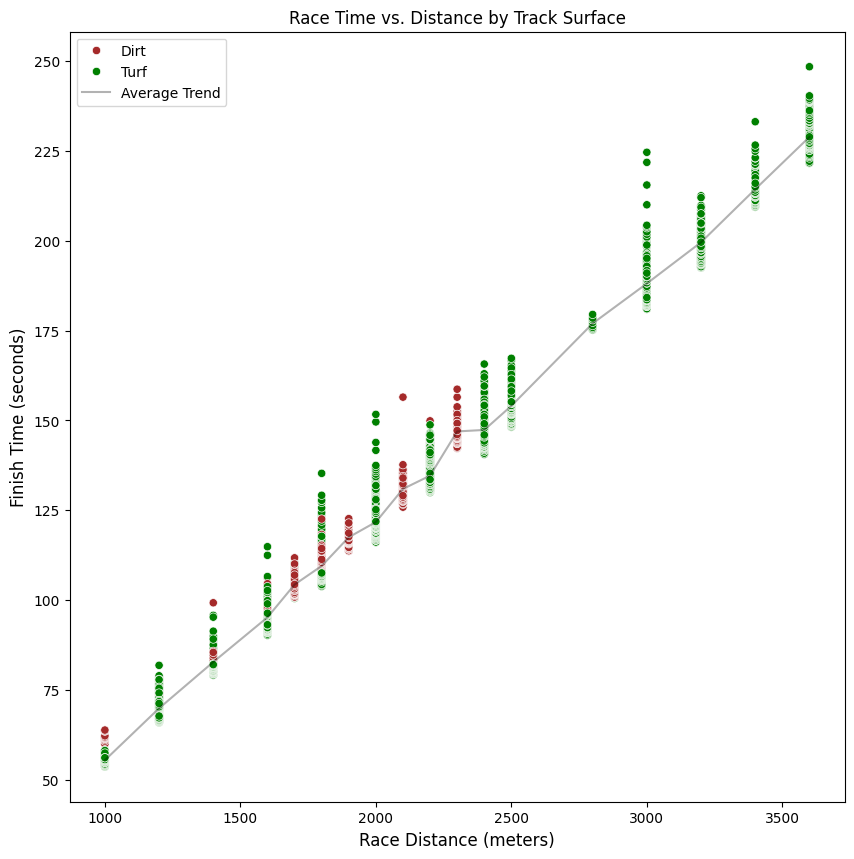

In [ ]:
# Analysis only contain a single race
winstrack = RRG[RRG['着順'] == 1].copy()
# Make a copy of RRG for this section
racestrack = RRG.copy()

# Count distribution for each turf track (芝) and dirt track (ダート) in column graded races
track_counts = (winstrack['芝・ダート区分'].value_counts(normalize=True) * 100).round(2).astype(str) + '%'
print(f"Distribution of race track for graded races are:")
print(f"Turf track had {track_counts['芝']} and Dirt Track had {track_counts['ダート']} of total graded races.")

# Count number of graded races based on track
num_track_graded = (
    winstrack
    .groupby(['リステッド・重賞競走', '芝・ダート区分'])['レースID']
    .count()
    .reset_index()  # Race_Distance & Race_Track become columns again
)

print("\nNumber of graded races based on race track:")
for i, row in num_track_graded.iterrows():
    print(f"{i+1}. {row['リステッド・重賞競走']} in {row['芝・ダート区分']} had {row['レースID']} races")

#Find the best horses for each track
# Count wins per horse
wins_turf = winstrack[winstrack['芝・ダート区分'].str.contains('芝')]
wins_dirt = winstrack[winstrack['芝・ダート区分'].str.contains('ダート')]
horse_wins_turf = wins_turf['馬名'].value_counts()
horse_wins_dirt = wins_dirt['馬名'].value_counts()

# Find the top 3 most winning horses for each track
top3turf = horse_wins_turf.head(3)
top3dirt = horse_wins_dirt.head(3)
print("\nTop 3 Most Winning Horses For Turf Track:")
for i, (horse, wins) in enumerate(top3turf.items(), 1):
    print(f"{i}. {horse}: {wins} wins")
print("\nTop 3 Most Winning Horses For Dirt Track:")
for i, (horse, wins) in enumerate(top3dirt.items(), 1):
    print(f"{i}. {horse}: {wins} wins")

# Find horses that ever win graded race in both track
# Get unique horse names that have won on turf
turf_winners = set(winstrack[winstrack['芝・ダート区分'] == '芝']['馬名'].unique())

# Get unique horse names that have won on dirt
dirt_winners = set(winstrack[winstrack['芝・ダート区分'] == 'ダート']['馬名'].unique())

# Find the intersection (common names) between the two sets
versatile_winner_names = turf_winners.intersection(dirt_winners)

# Find the number and percentage of horses that wins on both track
num_versatile_winner_names = len(versatile_winner_names)
allhorse = winstrack['馬名'].nunique()
winpercen = np.ceil((num_versatile_winner_names / allhorse) * 100)

print(f"\nThere is only {num_versatile_winner_names} horses that ever win both in turf and dirt track for graded races, it's only around {winpercen}% of total horses that ever win in graded races.")

# Find difference performance for both track
# Converting the 'タイム' column to datetime format for easier date manipulation
racestrack['Races_Time'] = pd.to_timedelta('00:' + racestrack['タイム'])

# Converting to only seconds for easier calculations
racestrack['Races_Seconds'] = racestrack['Races_Time'].dt.total_seconds()

# Then use these indices to get all the information about these records
horsetime_track = racestrack[['距離(m)','芝・ダート区分','Races_Seconds', '馬名']].copy()

# Rename columns for clarity
horsetime_track = horsetime_track.rename(columns={
    '馬名': 'Horse_Name',
    '距離(m)': 'Race_Distance',
    '芝・ダート区分': 'Race_Track'
})

# Find number of percentage for difference performance
# Create new dataframe that has average time for both track in each distance
avetimetrack = (
    horsetime_track
    .groupby(['Race_Distance', 'Race_Track'])['Races_Seconds']  # select as Series
    .mean()
    .reset_index()  # Race_Distance & Race_Track become columns again
)

# Pivot so each distance has two columns: ダート and 芝
pivot_att = avetimetrack.pivot(index='Race_Distance', columns='Race_Track', values='Races_Seconds')

# Calculate percentage difference: ((Dirt - Turf) / Turf) * 100
pivot_att['% Difference (Dirt vs Turf)'] = ((pivot_att['ダート'] - pivot_att['芝']) / pivot_att['芝']) * 100

# Calculate average of percentage difference
avediff = pivot_att['% Difference (Dirt vs Turf)'].mean().round(2)

print(f"\nIn average, horses that raced (same distance) in dirt track is {avediff}% slower than raced in turf track.")

print("\nGraph that show diffrence performance for each race track with race distance as parameter")

# Make a graph
# Hardcoded labels
label_map = {
    '芝': 'Turf',  # Map '芝' to 'Turf'
    'ダート': 'Dirt'  # Map 'ダート' to 'Dirt'
}
# Create the plot
fig, axes = plt.subplots(figsize=(10, 10))

# Stacked two graph in the same plot
# Scatter plot
sns.scatterplot(
    data=horsetime_track, 
    x='Race_Distance', 
    y='Races_Seconds', 
    hue='Race_Track', 
    palette={'芝': 'green', 'ダート': 'brown'},
    ax=axes,
    legend=True
)

# Line plot (e.g., average trend)
sns.lineplot(
    data=horsetime_track.groupby('Race_Distance')['Races_Seconds'].mean().reset_index(), 
    x='Race_Distance', 
    y='Races_Seconds', 
    color='black', 
    ax=axes,
    alpha = 0.3,
    label='Average Trend'
)

# Set legend labels explicitly
legend = axes.legend_
for text, label in zip(legend.texts, ['Dirt', 'Turf']):
    text.set_text(label)

# Customize titles and labels
axes.set_title('Race Time vs. Distance by Track Surface', fontsize=12)
axes.set_xlabel('Race Distance (meters)', fontsize=12)
axes.set_ylabel('Finish Time (seconds)', fontsize=12)

plt.show()

**Summary**

* In conclusion, the JRA heavily favors turf tracks over dirt tracks, as shown by the dominance of turf tracks throughout graded races.

* The horses with the most wins on turf tracks are TM Opera O and Oguri Cap, each with 12 wins.

* The top winning horses on dirt tracks are Incantation, Smart Boy, and Transcend, each with 5 wins.

* Only 31 horses have won on both turf and dirt tracks in graded races, which is approximately 2.0% of all horses that have won graded races.

* The black line in the graph represents the average trend in race times. It can be observed that whenever there is clustering of results on dirt tracks, the trend line slightly spikes upward, indicating a minor reduction in performance.

* Based on calculations, horses running the same distance on dirt tracks are on average 3.97% slower than those running on turf tracks.

* This suggests that dirt tracks have only a small influence on horse performance.

## **Distance (距離) and Race Course (競馬場名) Analysis**

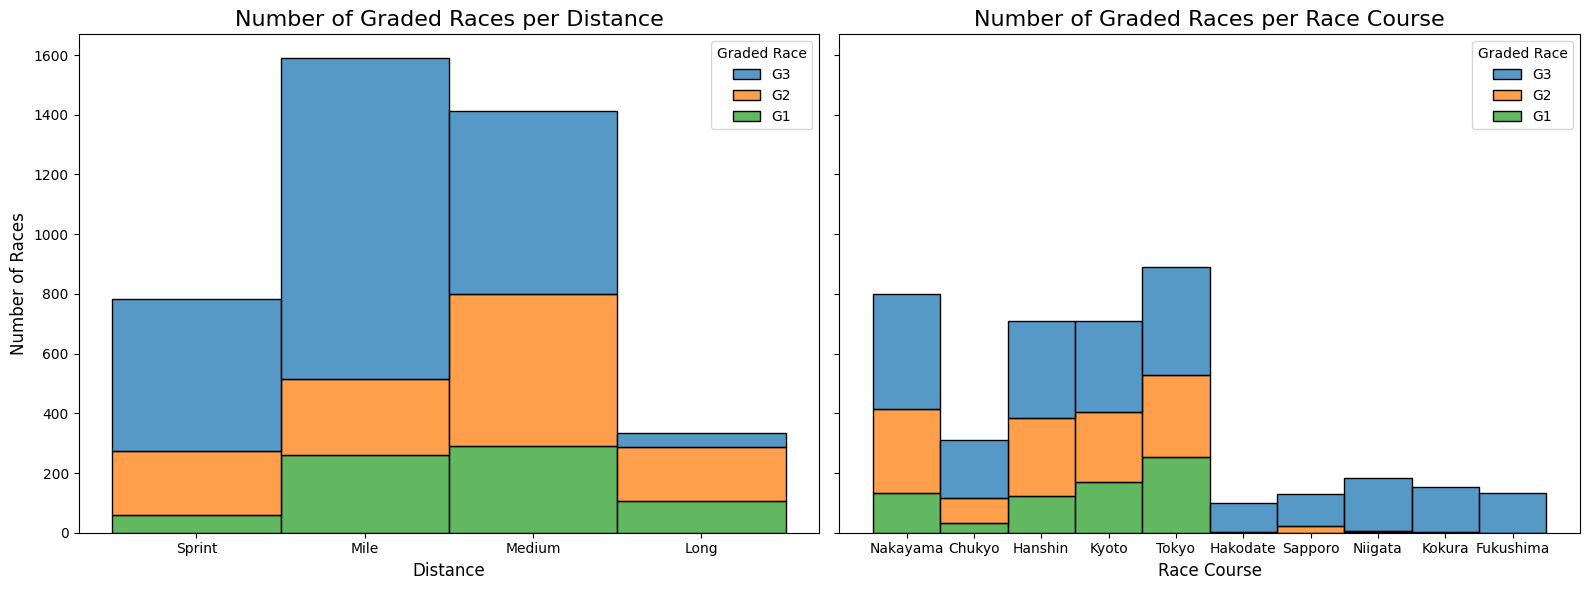


Favorite races for each distance based on 1st prize money:
1. Favorite races in Sprint distance is 高松宮記念
2. Favorite races in Mile distance is ジャパンカップダート
3. Favorite races in Medium distance is ジャパンカップ
4. Favorite races in Long distance is 有馬記念

Favorite races for each race course based on 1st prize money:
1. Favorite races in Chukyo race course is 高松宮記念
2. Favorite races in Hanshin race course is 宝塚記念
3. Favorite races in Kyoto race course is 菊花賞
4. Favorite races in Nakayama race course is 有馬記念
5. Favorite races in Tokyo race course is ジャパンカップ


In [4]:
# Analysis only contain a single race
coursetrack = RRG[RRG['着順'] == 1].copy()

# Categorize race distance based on Umamusume
# Define conditions and groups
conditions = [
    coursetrack['距離(m)'] <= 1400,
    (coursetrack['距離(m)'] > 1401) & (coursetrack['距離(m)'] <= 1800),
    (coursetrack['距離(m)'] > 1801) & (coursetrack['距離(m)'] <= 2400),
    coursetrack['距離(m)'] > 2400
]
choices = ['Sprint', 'Mile', 'Medium', 'Long']

coursetrack['Distance_Group'] = np.select(conditions, choices, default='Unknown')

# Rename Racecourse for easier analysis
# Create a dictionary to map old names to new names
renamecourse = {
    '札幌': 'Sapporo',
    '函館': 'Hakodate',
    '福島': 'Fukushima',
    '新潟': 'Niigata',
    '東京': 'Tokyo',
    '中山': 'Nakayama',
    '中京': 'Chukyo',
    '京都': 'Kyoto',
    '阪神': 'Hanshin',
    '小倉': 'Kokura'
}

# Apply the entire mapping to the 'Race_Course' column
coursetrack['Race_Course'] = coursetrack['競馬場名'].replace(renamecourse)

# Distributin of race distance
# Make a plot to show the graph
fig, ax = plt.subplots(1,2,figsize=(16, 6),sharey=True)

# Seaborn cannot read kanji, so lets create new columns with English translantion
coursetrack.loc[:, 'Graded Race'] = coursetrack['リステッド・重賞競走'].values

# Difine order of distance for easier readbility
distance_order = ['Sprint', 'Mile', 'Medium', 'Long']

# Convert to categorical with the specified order
coursetrack['Distance_Group'] = pd.Categorical(
    coursetrack['Distance_Group'],
    categories=distance_order,
    ordered=True
)

# Sort so histplot stacks in the right order
coursetrack = coursetrack.sort_values('Distance_Group')

# Make a histogram of the number races for each distance
sns.histplot(data=coursetrack, 
             x='Distance_Group', 
             hue='Graded Race', 
             discrete=True, 
             ax=ax[0], 
             multiple="stack")

# Adding titles and labels
ax[0].set_title('Number of Graded Races per Distance', fontsize=16)
ax[0].set_xlabel('Distance', fontsize=12)
ax[0].set_ylabel('Number of Races', fontsize=12)

sns.histplot(data=coursetrack, 
             x='Race_Course', 
             hue='Graded Race', 
             discrete=True, 
             ax=ax[1],
             multiple="stack")

# Adding titles and labels
ax[1].set_title('Number of Graded Races per Race Course', fontsize=16)
ax[1].set_xlabel('Race Course', fontsize=12)

plt.tight_layout()
plt.show()

# Find favorite races based on 1st place prize money for each distance
# Group by the distance category and find the index of the max prize in each group
maxprizelength = coursetrack.groupby('Distance_Group', observed=True)['賞金(万円)'].idxmax()

# Use .loc to select the full rows from the original DataFrame using these indices
favraceslength = coursetrack.loc[maxprizelength]
favraceslength = favraceslength.reset_index()

print("\nFavorite races for each distance based on 1st prize money:")
for i, row in favraceslength.iterrows():
    print(f"{i+1}. Favorite races in {row['Distance_Group']} distance is {row['レース名']}")

# Find favorite races based on 1st place prize money for each top 5 racecourse
# Group by the distance category and find the index of the max prize in each group
top5course = ['Nakayama','Chukyo','Hanshin','Kyoto','Tokyo']
top5rc = coursetrack[coursetrack['Race_Course'].isin(top5course)]
maxprizecourse = top5rc.groupby('Race_Course')['賞金(万円)'].idxmax()

# Use .loc to select the full rows from the original DataFrame using these indices
favcoursetrack = coursetrack.loc[maxprizecourse]
favcoursetrack = favcoursetrack.reset_index()

print("\nFavorite races for each race course based on 1st prize money:")
for i, row in favcoursetrack.iterrows():
    print(f"{i+1}. Favorite races in {row['Race_Course']} race course is {row['レース名']}")

***Summary***

* The most common distance used in graded races is the Mile distance, but most G1 races are held at Medium distances.

* Long-distance races have a unique distribution where G1 and G2 races have a fair share number of races, but there are very few G3 races.

* Sprint races have the fewest G1 races.

* Favorite races for each distance based on first prize money are:

    - Sprint: Takamatsunomiya Kinen

    - Mile: Japan Cup Dirt

    - Medium: Japan Cup

    - Long: Arima Kinen

<br>

* There are only 5 racecourses in Japan that host G1 races: Tokyo, Kyoto, Hanshin, Nakayama, and Chukyo.

* Excluding these 5 racecourses, the rest host only G2 and G3 races, with significantly fewer events.

* Tokyo, Nakayama, Hanshin, and Kyoto racecourses each have a fair share of graded races, but Tokyo racecourse hosts the most G1 races.

* Favorite races for each racecourse based on first prize money are:

    - Chukyo Racecourse: Takamatsunomiya Kinen

    - Hanshin Racecourse: Takarazuka Kinen

    - Kyoto Racecourse: Kikuka Sho

    - Nakayama Racecourse: Arima Kinen

    - Tokyo Racecourse: Japan Cup

## **Weather (天候) and Track Condition (馬場状態1) Analysis**

Distribution of Weather:
1. Sunny: 61.16%
2. Cloudy: 29.4%
3. Rain: 9.32%
4. Snow: 0.12%

Distribution of Track Condition:
1. Good: 80.53%
2. Slightly Heavy: 11.12%
3. Heavy: 5.49%
4. Poor: 2.86%

Average % difference in performance by Weather:
1. Cloudy: 0.56%
2. Rain: 1.44%
3. Snow: 1.87%
4. Sunny: 0.07%

Average % difference in performance by Track Condition:
1. Good: 0.27%
2. Heavy: 1.75%
3. Poor: 3.71%
4. Slightly Heavy: 1.36%


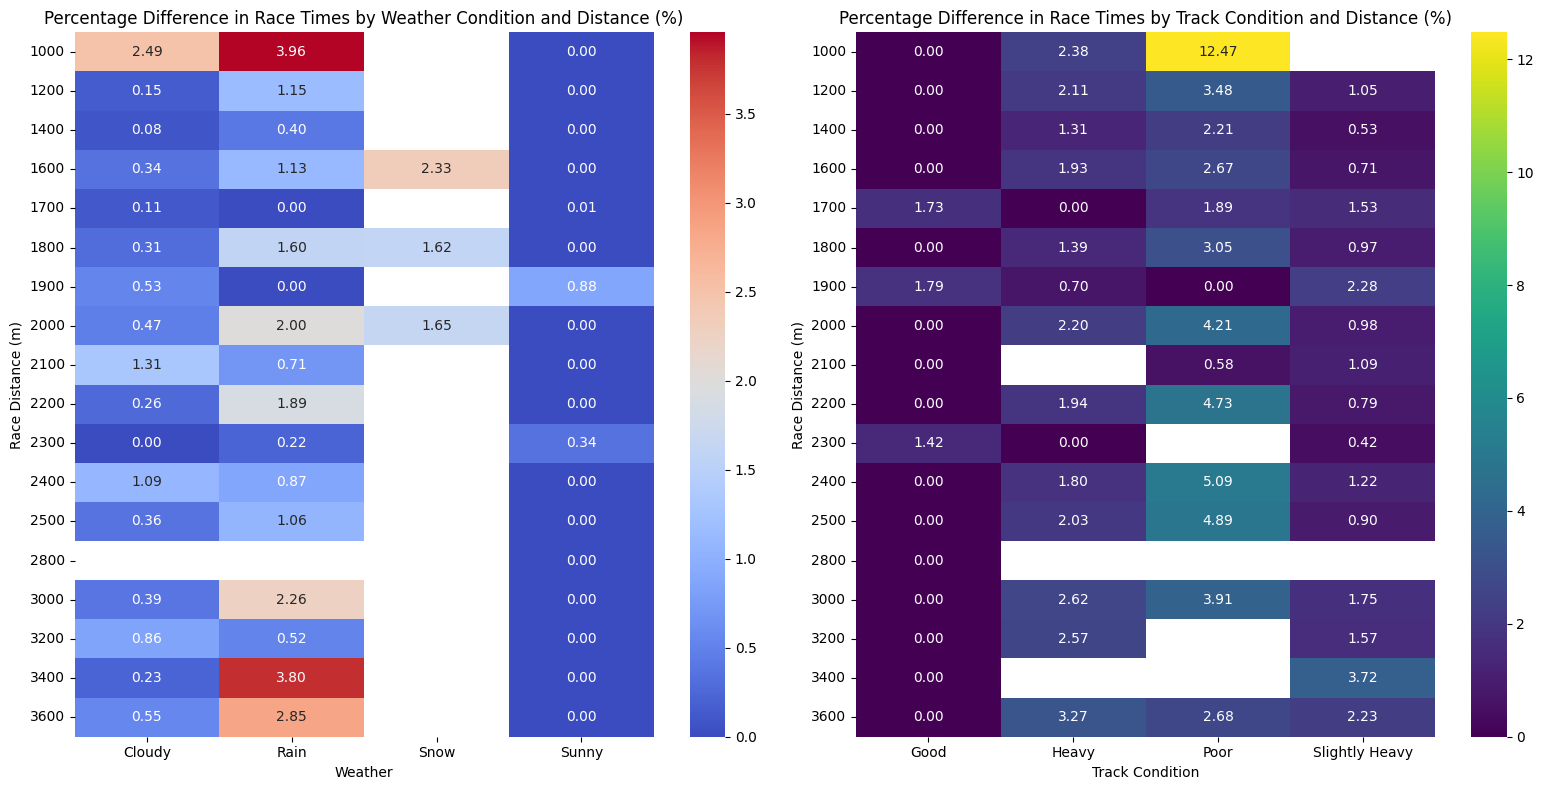

In [5]:
# Filter to only contain a single race for this section
CR = RRG[RRG['着順'] == 1].copy()
# CR = Condition Races
# Make a copy of RRG for this section
CRALL = RRG.copy()

# * Weather (天候)
# * Track Condition (馬場状態1)

# Renaming values for both weather and track condition for easier analysis
# Create a dictionary to map old names to new names
renameweather = {
    '曇': 'Cloudy', 
    '晴': 'Sunny', 
    '雨': 'Rain', 
    '小雨': 'Rain', 
    '雪': 'Snow', 
    '小雪': 'Snow'
}
# Categorize "slightly" weather into the same condition ex: slightly rain -> rain

renamectrack = {
    '良': 'Good',   
    '稍重': 'Slightly Heavy',
    '重': 'Heavy',      
    '不良': 'Poor'     
}

CR['Weather'] = CR['天候'].replace(renameweather)
CR['Track Condition'] = CR['馬場状態1'].replace(renamectrack)

# Find the distribution of weather and track condition
weather_counts = (CR['Weather'].value_counts(normalize=True) * 100).round(2).astype(str) + '%'
weather_counts = weather_counts.reset_index()
tc_counts = (CR['Track Condition'].value_counts(normalize=True) * 100).round(2).astype(str) + '%'
tc_counts = tc_counts.reset_index()

print("Distribution of Weather:")
for i, row in weather_counts.iterrows():
    print(f"{i+1}. {row['Weather']}: {row['proportion']}")

print("\nDistribution of Track Condition:")
for i, row in tc_counts.iterrows():
    print(f"{i+1}. {row['Track Condition']}: {row['proportion']}")

# Find performance diffence for weather and track condition

CRALL['Weather'] = CRALL['天候'].replace(renameweather)
CRALL['Track Condition'] = CRALL['馬場状態1'].replace(renamectrack)

# Converting the 'タイム' column to datetime format for easier date manipulation
CRALL['Races_Time'] = pd.to_timedelta('00:' + CRALL['タイム'])

# Converting to only seconds for easier calculations
CRALL['Races_Seconds'] = CRALL['Races_Time'].dt.total_seconds()

# Then use these indices to get all the information about these records
horsetime_cond = CRALL[['距離(m)','Track Condition','Weather','Races_Seconds','馬名']].copy()

# Rename columns for clarity
horsetime_cond = horsetime_cond.rename(columns={
    '馬名': 'Horse_Name',
    '距離(m)': 'Race_Distance',
})

# Find number of percentage for difference performance
# Create new dataframe that has average time for both weather and track condition in each distance
avetimeweat = (
    horsetime_cond
    .groupby(['Race_Distance', 'Weather'])['Races_Seconds']  # select as Series
    .mean()
    .reset_index()  # Race_Distance & Race_Track become columns again
)

avetimecond = (
    horsetime_cond
    .groupby(['Race_Distance', 'Track Condition'])['Races_Seconds']  # select as Series
    .mean()
    .reset_index()  # Race_Distance & Race_Track become columns again
)

# Pivot so each distance has two columns:
pivot_attW = avetimeweat.pivot(index='Race_Distance', columns='Weather', values='Races_Seconds')
pivot_attC = avetimecond.pivot(index='Race_Distance', columns='Track Condition', values='Races_Seconds')

# Calculate percentage difference relative to the fastest (minimum) time at each distance for Weather:
pivot_attW_pct_diff = pivot_attW.apply(lambda row: (row - row.min()) / row.min() * 100, axis=1)

# Similarly, for Track Condition:
pivot_attC_pct_diff = pivot_attC.apply(lambda row: (row - row.min()) / row.min() * 100, axis=1)

# Now you can calculate the average percentage difference across all distances by condition:
avediff_weather = pivot_attW_pct_diff.mean().round(2)
avediff_track = pivot_attC_pct_diff.mean().round(2)

print("\nAverage % difference in performance by Weather:")
for i, (weather, avg_diff) in enumerate(avediff_weather.items(), 1):
    print(f"{i}. {weather}: {avg_diff}%")

print("\nAverage % difference in performance by Track Condition:")
for i, (weather, avg_diff) in enumerate(avediff_track.items(), 1):
    print(f"{i}. {weather}: {avg_diff}%")

fig, ax = plt.subplots(1,2,figsize=(16, 8))

sns.heatmap(pivot_attW_pct_diff, annot=True, fmt=".2f", cmap="coolwarm", ax=ax[0])
ax[0].set_title("Percentage Difference in Race Times by Weather Condition and Distance (%)")
ax[0].set_xlabel("Weather")
ax[0].set_ylabel("Race Distance (m)")

sns.heatmap(pivot_attC_pct_diff, annot=True, fmt=".2f", cmap="viridis", ax=ax[1])
ax[1].set_title("Percentage Difference in Race Times by Track Condition and Distance (%)")
ax[1].set_xlabel("Track Condition")
ax[1].set_ylabel("Race Distance (m)")

plt.tight_layout()
plt.show()

***Summary***
* Most graded races held in Japan take place in Sunny weather and under Good track conditions.

* The analysis of performance differences by weather and track condition is based on the best record time for each distance 

    (for example, the best record time for the 1900 m distance occurred in rainy weather and heavy track conditions, so other weather and track conditions are compared relative to that).

* The ideal weather and track conditions for races are Sunny weather and Good track condition.

* Rainy and snowy weather have a negative impact on race performance, although the effect is not very significant.

* Poor track conditions reduce race performance by 3.71%, while heavy and slightly heavy track conditions have only a minor impact on lowering performance.

* White or empty spaces in the graphs indicate that there is no data available for races at that specific distance.

## **Favorite Horse (人気), Win Odds (単勝), and Gate Number (馬番) Analysis**

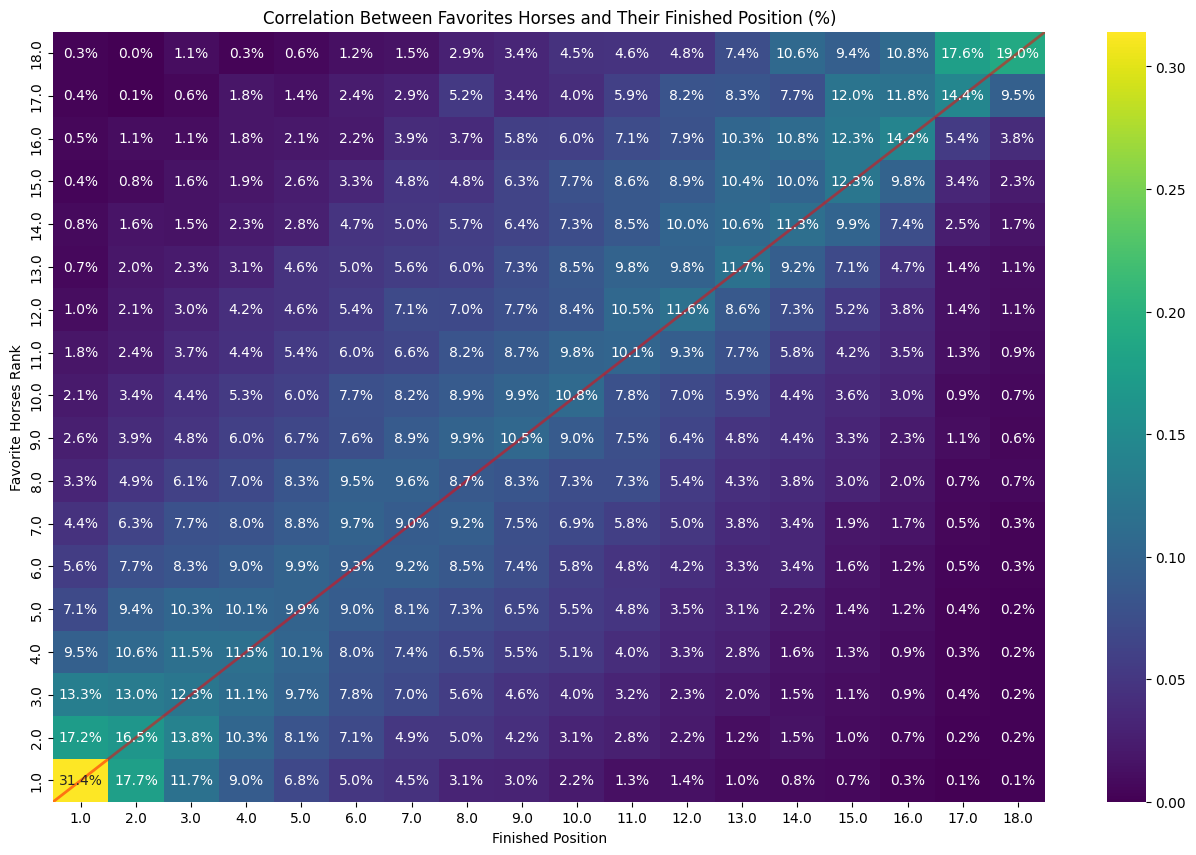

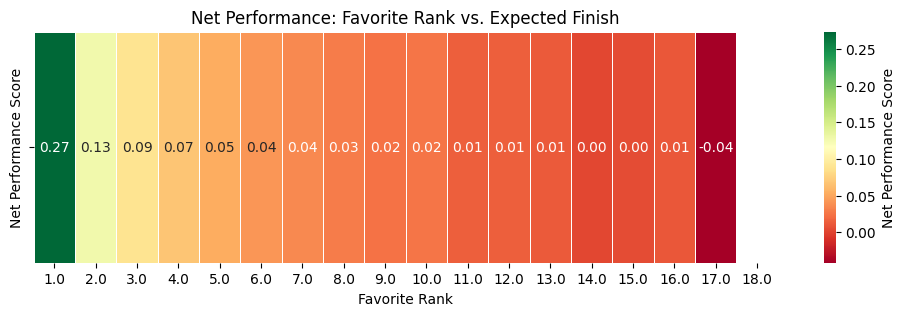

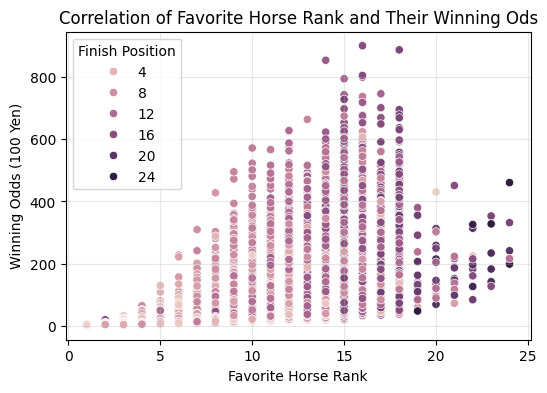

Top 3 Most Favorite Horses in G1 Races:
1. ディープインパクト: 1.0
2. アーモンドアイ: 1.08
3. ロードカナロア: 1.09

Top 3 "Dark Horse" in G1 Races:
1. ヤマニンゼファー: 1.28
2. メイショウドトウ: 1.00
3. ディープスカイ: 0.80

Top 3 Profitable Horses in G1 Races:
1. アグネスデジタル with total win odds of 88.60
2. ロゴタイプ with total win odds of 75.10
3. ヒシミラクル with total win odds of 69.00


In [6]:
# Filter to only contain a single race for this section
RW = RRG[RRG['着順'] == 1].copy()
# RW = Race Winner
# Make a copy of RRG for this section
AHR = RRG.copy()
# All Horse Race

# Construct dataframe for this analysis
# WC = Winning Chance
# WC = RW['レースID','レース名','馬名','人気','単勝','馬番','着順']

#Renaming column for easier readbilty
rename_col = {
    "人気": "Favorite Horse",
    "単勝": "Winning Odds (100 Yen)",
    'レースID': 'Race ID',
    '馬名': 'Horse Name',
    'レース名': 'Race Name',
    '着順': 'Finish Position',
    "馬番": "Gate Number"
}
AHR = AHR.rename(columns=rename_col)
RW = RW.rename(columns=rename_col)

# Find corellation Favorite Horse - Winning The Race
# Most races only had maximum of 18 horses in a races, so to minimize any outlier, i filtered it out
TOPRACESFAV = AHR.loc[AHR['Favorite Horse'] <= 18]
TOPRACESFIN = AHR.loc[AHR['Finish Position'] <= 18]

# Count the corellation
# CT = Cross Tab
CT = pd.crosstab(
    TOPRACESFAV['Favorite Horse'], 
    TOPRACESFIN['Finish Position'],
    normalize='index'  # Normalize by row to show percentages
)

# Calculate "better than expected" performance
better_than_rank = {}
for rank in CT.index:
    better_prob = CT.loc[rank, :rank].mean() 
    better_than_rank[rank] = better_prob

# Calculate "worse than expected" performance
worse_than_rank = {}
for rank in CT.index:
    worse_prob = CT.loc[rank, rank+1:].mean() 
    worse_than_rank[rank] = worse_prob

# Find their performance
net_performance = {
    rank: better_than_rank[rank] - worse_than_rank[rank]
    for rank in CT.index
}
performance_df = pd.DataFrame({
    'Favorite Rank': list(net_performance.keys()),
    'Net Performance Score': list(net_performance.values())
}).set_index('Favorite Rank')

line = pd.DataFrame(CT, index=range(1, 19), columns=range(1, 19))

fig, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(CT, annot=True, fmt='.1%', cmap="viridis", ax=ax)
ax.set_title("Correlation Between Favorites Horses and Their Finished Position (%)")
ax.set_xlabel("Finished Position")
ax.set_ylabel("Favorite Horses Rank")
ax.plot([0, line.shape[1]], [0, line.shape[0]], color='red', alpha=0.5, lw=2)
ax.invert_yaxis()

fig, ax = plt.subplots(figsize=(12, 3))

sns.heatmap(
    performance_df.T,  # Transpose to show ranks as columns
    annot=True,
    fmt=".2f",
    cmap="RdYlGn",  # Red (bad) to Green (good)        # Neutral at 0
    linewidths=0.5,
    cbar_kws={'label': 'Net Performance Score'},
    ax=ax
)
ax.set_title('Net Performance: Favorite Rank vs. Expected Finish')
ax.set_xlabel('Favorite Rank')

plt.figure(figsize=(6, 4))
sns.scatterplot(data=AHR, x='Favorite Horse',y='Winning Odds (100 Yen)',hue='Finish Position')
plt.title('Correlation of Favorite Horse Rank and Their Winning Ods')
plt.ylabel('Winning Odds (100 Yen)')
plt.xlabel('Favorite Horse Rank')
plt.grid(True, alpha=0.3)

plt.show()

# Find most farvorited horse in G1
G1races = AHR[AHR['リステッド・重賞競走'] == 'G1']
# Filter horses with >=5 G1 starts 
elite_horses = (
    G1races['Horse Name']
    .value_counts()
    .loc[lambda x: x >= 5]
    .index
)
# Calculate average favorite rank 
favG1 = (
    AHR[AHR['Horse Name'].isin(elite_horses)]
    .groupby('Horse Name', as_index=False)
    .agg(Average_Favorite=('Favorite Horse', 'mean'))
    .round(2)
)
# Find the top 3 favorite horse 
top3_favorites = (
    favG1.sort_values('Average_Favorite')
    .head(3)
    .reset_index()
)

print("Top 3 Most Favorite Horses in G1 Races:")
for i, row in top3_favorites.iterrows():
    print(f"{i+1}. {row['Horse Name']}: {row['Average_Favorite']}")

# Find the "Dark Horse"
# Calculate average favorite rank 
favall = (
    AHR[AHR['Horse Name'].isin(elite_horses)]
    .groupby('Horse Name', as_index=False)
    .agg(Average_Favorite=('Favorite Horse', 'mean'))
    .round(2)
)
# Calculate average finish position
avewinall = (
    AHR[AHR['Horse Name'].isin(elite_horses)]
    .groupby('Horse Name', as_index=False)
    .agg(Average_Win=('Finish Position', 'mean'))
    .round(2)
)

# Merged two column into 1 dataframe
performanceall = pd.merge(favall, avewinall, on="Horse Name")

# Filter to only horses that had average finish position of 3 or less
performanceall = performanceall[performanceall['Average_Win'] <= 3]

# Calculate difference
performanceall["Average Performance"] = performanceall["Average_Favorite"] - performanceall["Average_Win"]

# Find top 3 performer horses
top3_performance = (
    performanceall.sort_values('Average Performance',ascending=False)
    .head(3)
    .reset_index()
)

print('\nTop 3 "Dark Horse" in G1 Races:')
for i, row in top3_performance.iterrows():
    print(f"{i+1}. {row['Horse Name']}: {row['Average Performance']:.2f}")

# Find the most profitable horses
# Only count G1 winner
G1RW = RW[RW['リステッド・重賞競走'] == 'G1']
# Filter horses that win atleast 3 G1 races
G1elite = (
    G1RW['Horse Name']
    .value_counts()
    .loc[lambda x: x >= 3]
    .index
)

# Calculate total win odds
aveoddswin = (
    G1RW[G1RW['Horse Name'].isin(G1elite)]
    .groupby('Horse Name', as_index=False)
    .agg(Average_Odds=('Winning Odds (100 Yen)', 'sum'))
    .round(2)
)

# Find top 3 profitable horsed
top3_profit = (
    aveoddswin.sort_values('Average_Odds',ascending=False)
    .head(3)
    .reset_index()
)

print('\nTop 3 Profitable Horses in G1 Races:')
for i, row in top3_profit.iterrows():
    print(f"{i+1}. {row['Horse Name']} with total win odds of {row['Average_Odds']:.2f}")

***Summary***

1. Correlation Between Favorite Horse Rank and Their Finished Position

    * Approximately 31.4% of horses favored as number 1 actually finished 1st in their respective races.

    * The diagonal red line represents the finishing position when it matches the favorite rank. Values above this line indicate an overperforming finish, while values below indicate an underperforming finish.

    * There is a strong correlation between favorite rank and finishing position, evident from the concentration of higher values around the red line.

    * To measure overperformance, I calculated the average values above the red line and subtracted the average values below it to get the net performance.

    * It can be concluded that horses with higher favorite ranks have a better chance of finishing above expectations, with the top 5 favorites showing significantly better chances than the others.

<br>

2. Correlation Between Favorite Rank, Win Odds, and Their Finished Position

    * There is a positive correlation between favorite rank and win odds, as shown in the graph.

    * Lower favorite ranks correspond to a wider range of win odds.

<br>

3. The "Dark Horses" of JRA<br>
    Top 3 Most Favored Horses in G1 Races:

        1. Deep Impact: 1.0

        2. Almond Eye: 1.08

        3. Lord Kanaloa: 1.09
    (Based on the average favorite rank number with at least 5 G1 race participations; lower is better.)

    <br>

    Top 3 "Dark Horses" in G1 Races:

        1. Yamanin Zephyr: 1.28

        2. Meisho Dotou: 1.00

        3. Deep Sky: 0.80
    (Based on the difference between average favorite rank and finishing position, with a minimum of 5 G1 race participations, averaged over the top 3 finishing positions.)

    <br>

    Top 3 Most Profitable Horses in G1 Races:

        1. Agnes Digital with total win odds of 88.60

        2. Logotype with total win odds of 75.10

        3. Hishi Miracle with total win odds of 69.00
    (Based on the total win odds with a minimum of 5 G1 race participations.)

## ***EXTRA***

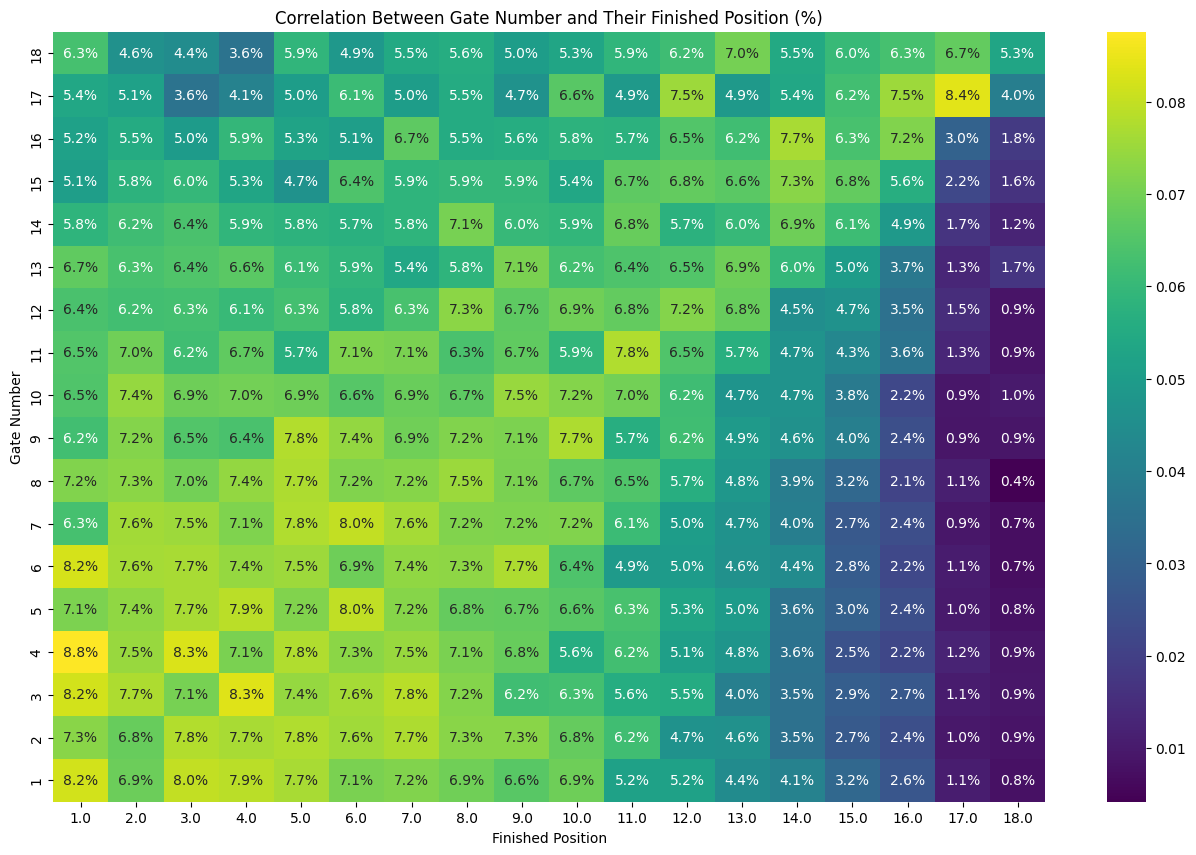

In [7]:
# Find correlattion between gate number and finished position 
# (ONLY HAVE 1 GRAPH BUT THE RESULT IS NOT IDEAL BECAUSE OF VARIATION NUMBER OF HORSES THAT PARTICIPATED IN)
# Count the corellation
TOPRACESGATE = AHR.loc[AHR['Gate Number'] <= 18]
# CT = Cross Tab Gate Number
CTGN = pd.crosstab(
    TOPRACESGATE['Gate Number'], 
    TOPRACESFIN['Finish Position'],
    normalize='index'  # Normalize by row to show percentages
)

fig, ax = plt.subplots(figsize=(16, 10))

sns.heatmap(CTGN, annot=True, fmt='.1%', cmap="viridis", ax=ax)
ax.set_title("Correlation Between Gate Number and Their Finished Position (%)")
ax.set_xlabel("Finished Position")
ax.set_ylabel("Gate Number")
ax.invert_yaxis()

# Count number of starters per race
# (MORE IDEAL OF REPRESENTATION BECAUSE ANALYSIS IS BASED ON GROUP NUMBER OF HORSES)

# To print all of the graph (More than 10 graph) please uncomment code below. 
# How to uncomment code: (Select all of code below, then press ctrl+/)
# race_sizes = AHR.groupby('Race ID').size().reset_index(name='num_starters')

# AHR = AHR.merge(race_sizes, on='Race ID')

# # Get unique race sizes present in your data
# race_sizes_unique = AHR['num_starters'].unique()
# race_sizes_unique.sort()

# for size in race_sizes_unique:
#     # Filter for races of this size
#     df_size = AHR[AHR['num_starters'] == size]
    
#     # Crosstab normalized by gate number, show percent finished positions for that gate
#     crosstab = pd.crosstab(
#         df_size['Gate Number'], 
#         df_size['Finish Position'],
#         normalize='index'
#     )
    
#     plt.figure(figsize=(12, 8))
#     sns.heatmap(crosstab, annot=True, fmt='.1%', cmap='viridis')
#     plt.title(f'Correlation Between Gate Number and Finish Position\nfor Races with {size} Horses')
#     plt.xlabel('Finished Position')
#     plt.ylabel('Gate Number')
#     plt.gca().invert_yaxis()
#     plt.show()
